In [2]:
%run convention.ipynb

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Using Tensorflow like Numpy

## Creating

In [2]:
import tensorflow as tf
X = tf.constant([[1,2,3],[4,5,6], [7,8,9]], dtype = tf.float32, name = 'X')

## Indexing

<p class = 'highlight'>Just like a Numpy array</p>

In [3]:
X[1:, 1:]

<tf.Tensor: id=4, shape=(2, 2), dtype=float32, numpy=
array([[5., 6.],
       [8., 9.]], dtype=float32)>

## Operations 

In [4]:
tf.transpose(X) @ X

<tf.Tensor: id=7, shape=(3, 3), dtype=float32, numpy=
array([[ 66.,  78.,  90.],
       [ 78.,  93., 108.],
       [ 90., 108., 126.]], dtype=float32)>

In [5]:
tf.square(X)

<tf.Tensor: id=8, shape=(3, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.],
       [49., 64., 81.]], dtype=float32)>

In [6]:
tf.reduce_mean(X, axis = 1, keepdims = True)

<tf.Tensor: id=10, shape=(3, 1), dtype=float32, numpy=
array([[2.],
       [5.],
       [8.]], dtype=float32)>

## Properties

In [7]:
X.dtype

tf.float32

In [8]:
X.shape

TensorShape([3, 3])

In [9]:
X.ndim

2

## Type Conversion: <code>tf.cast()</code>

In [10]:
x = tf.constant(4, dtype = tf.float32, name= 'x')
y = tf.constant(5, dtype = tf.float64, name = 'y')
try:
    x + y
except:
    print('Missmatched type')

Missmatched type


In [11]:
x + tf.cast(y, tf.float32)

<tf.Tensor: id=14, shape=(), dtype=float32, numpy=9.0>

## Variables

### Creating

In [12]:
x = tf.Variable([[1,2,3],[4,5,6],[7,8,9]], name = 'x', dtype = tf.int8)

### updating

In [13]:
x.assign(x + 1)
x

<tf.Variable 'x:0' shape=(3, 3) dtype=int8, numpy=
array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]], dtype=int8)>

In [14]:
x[0].assign([-1,-1,-1])
x



<tf.Variable 'x:0' shape=(3, 3) dtype=int8, numpy=
array([[-1, -1, -1],
       [ 5,  6,  7],
       [ 8,  9, 10]], dtype=int8)>

# Customizing models and training algorithms

## Custom loss function

In [48]:
def cross_entropy(y_true, y_pred):
    return -tf.multiply(y_true, tf.math.log(y_pred))

In [72]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping


iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size = .8, random_state = 5)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = .8, random_state = 6)
y_train = to_categorical(y_train, num_classes=3)
y_valid = to_categorical(y_valid, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

model = Sequential([
    BatchNormalization(),
    Dense(10, activation = 'elu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = cross_entropy, metrics = ['accuracy'])

In [73]:
from keras.callbacks import ModelCheckpoint
checkpoint_cb = ModelCheckpoint('custom_loss_model.h5', save_best_only= True)
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 150, batch_size = 32, callbacks = [EarlyStopping(patience = 10, restore_best_weights = True), checkpoint_cb])

Train on 96 samples, validate on 24 samples
Epoch 1/150
96/96 [==============================] - 1s 9ms/step - loss: 0.7972 - accuracy: 0.0625 - val_loss: 1.3359 - val_accuracy: 0.0000e+00
Epoch 2/150
96/96 [==============================] - 0s 72us/step - loss: 0.7800 - accuracy: 0.0625 - val_loss: 1.2741 - val_accuracy: 0.0000e+00
Epoch 3/150
96/96 [==============================] - 0s 62us/step - loss: 0.7562 - accuracy: 0.0729 - val_loss: 1.2248 - val_accuracy: 0.0417
Epoch 4/150
96/96 [==============================] - 0s 83us/step - loss: 0.7439 - accuracy: 0.0625 - val_loss: 1.1866 - val_accuracy: 0.1250
Epoch 5/150
96/96 [==============================] - 0s 214us/step - loss: 0.7069 - accuracy: 0.0729 - val_loss: 1.1576 - val_accuracy: 0.3333
Epoch 6/150
96/96 [==============================] - 0s 93us/step - loss: 0.6879 - accuracy: 0.1250 - val_loss: 1.1340 - val_accuracy: 0.3750
Epoch 7/150
96/96 [==============================] - 0s 83us/step - loss: 0.6749 - accuracy: 0.0

Epoch 58/150
96/96 [==============================] - 0s 73us/step - loss: 0.2362 - accuracy: 0.7917 - val_loss: 0.2711 - val_accuracy: 0.4583
Epoch 59/150
96/96 [==============================] - 0s 62us/step - loss: 0.2330 - accuracy: 0.7292 - val_loss: 0.2623 - val_accuracy: 0.4583
Epoch 60/150
96/96 [==============================] - 0s 93us/step - loss: 0.2172 - accuracy: 0.7604 - val_loss: 0.2537 - val_accuracy: 0.5417
Epoch 61/150
96/96 [==============================] - 0s 93us/step - loss: 0.2159 - accuracy: 0.7812 - val_loss: 0.2457 - val_accuracy: 0.5417
Epoch 62/150
96/96 [==============================] - 0s 72us/step - loss: 0.2204 - accuracy: 0.7812 - val_loss: 0.2380 - val_accuracy: 0.6667
Epoch 63/150
96/96 [==============================] - 0s 73us/step - loss: 0.2126 - accuracy: 0.8021 - val_loss: 0.2308 - val_accuracy: 0.7083
Epoch 64/150
96/96 [==============================] - 0s 62us/step - loss: 0.2115 - accuracy: 0.8021 - val_loss: 0.2239 - val_accuracy: 0.7500

96/96 [==============================] - 0s 62us/step - loss: 0.1308 - accuracy: 0.8854 - val_loss: 0.0972 - val_accuracy: 0.9583
Epoch 116/150
96/96 [==============================] - 0s 62us/step - loss: 0.1239 - accuracy: 0.8750 - val_loss: 0.0963 - val_accuracy: 0.9583
Epoch 117/150
96/96 [==============================] - 0s 73us/step - loss: 0.1240 - accuracy: 0.8750 - val_loss: 0.0955 - val_accuracy: 0.9583
Epoch 118/150
96/96 [==============================] - 0s 83us/step - loss: 0.1228 - accuracy: 0.9271 - val_loss: 0.0947 - val_accuracy: 0.9583
Epoch 119/150
96/96 [==============================] - 0s 73us/step - loss: 0.1195 - accuracy: 0.8854 - val_loss: 0.0938 - val_accuracy: 0.9583
Epoch 120/150
96/96 [==============================] - 0s 52us/step - loss: 0.1165 - accuracy: 0.8854 - val_loss: 0.0930 - val_accuracy: 0.9583
Epoch 121/150
96/96 [==============================] - 0s 62us/step - loss: 0.1164 - accuracy: 0.8958 - val_loss: 0.0923 - val_accuracy: 0.9583
Epoch 

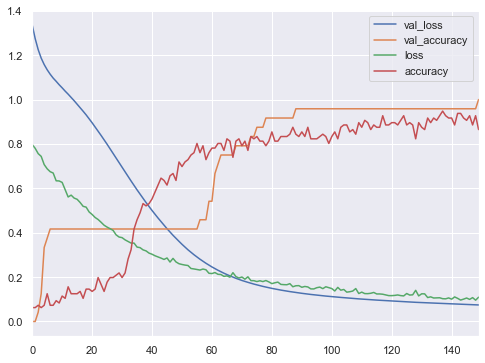

In [74]:
pd.DataFrame(history.history).plot(figsize = (8,6))

In [69]:
model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 366us/step


[0.08615051209926605, 0.9333333373069763]

## Saving and Loading Models that contain Custom Components

when
you load a model containing custom objects, you need to map the names to the
objects:

In [76]:
from keras.models import load_model
my_model = load_model('custom_loss_model.h5', custom_objects = {'cross_entropy': cross_entropy})

In [77]:
my_model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_39 (Batc (None, 4)                 16        
_________________________________________________________________
dense_39 (Dense)             (None, 10)                50        
_________________________________________________________________
batch_normalization_40 (Batc (None, 10)                40        
_________________________________________________________________
dense_40 (Dense)             (None, 3)                 33        
Total params: 139
Trainable params: 111
Non-trainable params: 28
_________________________________________________________________


But what if we want to use a <b>custom loss function</b> that accepts <b>hyperparameters</b>?<br>
When we save the model, the values of hyperparameters will not be saved.
<p class = 'highlight'>
    You can solve this by creating a subclass of the <code>keras.losses.Loss</code> class, and implement its <code>get_config()</code> method
</p>

<a href = 'https://en.wikipedia.org/wiki/Huber_loss' target = '_blank'>The Huber loss function</a>

In [79]:
import keras
class Huber(keras.losses.Loss):
    def __init__(self, gamma = 1, **kwargs):
        self.gamma = gamma
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_pred - y_true
        is_small = abs(error) < self.gamma
        return tf.where(is_small, 1 / 2 * tf.square(error), self.gamma * (tf.abs(error) - self.gamma / 2))
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, 'gamma' : self.gamma}

In [101]:

class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

<img src = 'custom.png'/>

In [106]:
huber_model = model = Sequential([
    BatchNormalization(),
    Dense(10, activation = 'elu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dense(3, activation = 'softmax')
])

huber_model.compile(optimizer = 'adam', loss = Huber(.5, name = 'Huber'), metrics = ['accuracy'])
huber_checkpoint_cb = ModelCheckpoint('huber_custom_model.h5', save_best_only=True)
huber_hist = huber_model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 100, callbacks = [huber_checkpoint_cb])

Train on 96 samples, validate on 24 samples
Epoch 1/100
96/96 [==============================] - 2s 21ms/step - loss: 0.1780 - accuracy: 0.1146 - val_loss: 0.1198 - val_accuracy: 0.4167
Epoch 2/100
96/96 [==============================] - 0s 72us/step - loss: 0.1707 - accuracy: 0.1562 - val_loss: 0.1210 - val_accuracy: 0.4167
Epoch 3/100
96/96 [==============================] - 0s 94us/step - loss: 0.1719 - accuracy: 0.1458 - val_loss: 0.1220 - val_accuracy: 0.4167
Epoch 4/100
96/96 [==============================] - 0s 103us/step - loss: 0.1696 - accuracy: 0.1354 - val_loss: 0.1231 - val_accuracy: 0.4167
Epoch 5/100
96/96 [==============================] - 0s 114us/step - loss: 0.1652 - accuracy: 0.1458 - val_loss: 0.1238 - val_accuracy: 0.4167
Epoch 6/100
96/96 [==============================] - 0s 104us/step - loss: 0.1648 - accuracy: 0.1354 - val_loss: 0.1246 - val_accuracy: 0.4167
Epoch 7/100
96/96 [==============================] - 0s 94us/step - loss: 0.1609 - accuracy: 0.1979 -

Epoch 58/100
96/96 [==============================] - 0s 83us/step - loss: 0.0461 - accuracy: 0.7604 - val_loss: 0.0470 - val_accuracy: 0.7917
Epoch 59/100
96/96 [==============================] - 0s 52us/step - loss: 0.0447 - accuracy: 0.8438 - val_loss: 0.0454 - val_accuracy: 0.8333
Epoch 60/100
96/96 [==============================] - 0s 62us/step - loss: 0.0463 - accuracy: 0.8125 - val_loss: 0.0439 - val_accuracy: 0.8333
Epoch 61/100
96/96 [==============================] - 0s 62us/step - loss: 0.0426 - accuracy: 0.8333 - val_loss: 0.0424 - val_accuracy: 0.8333
Epoch 62/100
96/96 [==============================] - 0s 83us/step - loss: 0.0456 - accuracy: 0.8021 - val_loss: 0.0411 - val_accuracy: 0.8333
Epoch 63/100
96/96 [==============================] - 0s 167us/step - loss: 0.0429 - accuracy: 0.8333 - val_loss: 0.0397 - val_accuracy: 0.8333
Epoch 64/100
96/96 [==============================] - 0s 104us/step - loss: 0.0419 - accuracy: 0.8333 - val_loss: 0.0385 - val_accuracy: 0.83

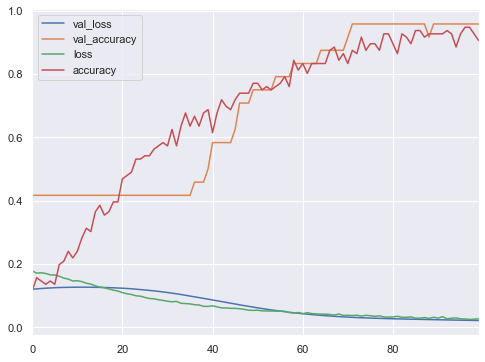

In [107]:
pd.DataFrame(huber_hist.history).plot(figsize = (8,6))

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization
from keras.models import Sequential
from keras.utils import 

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 5)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state = 6)

model = Sequential([
    BatchNormalization(),
    Dense(10, activation = 'elu', kernel_initializer = 'he_normal'),
    BatchNormalization(),
    Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = cross_entropy, metrics = ['accuracy'])

Loading model:

<code>my_huber_model = load_model('huber_custom_model.h5', custom_objects = {'HuberLoss' : HuberLoss})</code>

## Custom Activation Functions, Initializers, Regularizers, and Constraints


Softplus activation: $f(x) = log(e^x + 1)$

In [109]:
def my_softplus(x):
    return tf.math.log(tf.exp(x) + 1)

Glorot initializer:

In [110]:
def my_glorot_initializer(shape, dtype = tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)


l1 Regularizer with $\alpha$ = .01:

In [112]:
def my_l1_regulizer(weights):
    return tf.reduce_sum(.01 * tf.abs(weights))

Positive weights constraint: ensure that all weights are positive

In [114]:
def my_positive_constraint(weights):
    return tf.where(weights < 0, tf.zeros_like(weights), weights)

In [115]:
layer = Dense(100, 
              activation=my_softplus,
             kernel_initializer=my_glorot_initializer,
             kernel_regularizer=my_l1_regulizer,
             kernel_constraint=my_positive_constraint)

If a function has some hyperparameters that need to be saved along with the model,
then you will want to subclass the appropriate class, such as <code>keras.regularizers.Regularizer, keras.constraints.Constraint, keras.initializers</code>.Initial
izer or keras.layers.Layer (for any layer, including activation functions).

Note that you must implement the <code>call()</code> method for losses, layers (including activa‐
tion functions) and models, or the <code>--call--()</code> method for regularizers, initializers
and constraints. For metrics, things are a bit different, as we will see now.

In [116]:
class L1(keras.regularizers.Regularizer):
    def __init__(self, alpha = 1, **kwargs):
        self.alpha = alpha
        super().__init__(**kwargs)
    def __call__(self, weights):
        return tf.reduce_sum(self.alpha * tf.abs(weights))
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, 'alpha': self.alpha}

In [117]:
l1_regularizer = L1(.001)

## Custom metrics

### Precision

In [8]:
import keras
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor 'Identity_1:0' shape=() dtype=float32>

At any point, we can call the <code>result()</code> method to get the current value of the metric.
We can also look at its <code>variables</code> (tracking the number of true and false positives)
using the <code>variables</code> attribute, and reset these variables using the <code>reset_states()</code>
method:

In [7]:
precision?

# Computing Gradient using Autodiff

In [1]:
import tensorflow as tf

In [8]:
def f(x, y):
    return x * x + y * y

x = tf.Variable(5, dtype = tf.float32)
y = tf.Variable(10, dtype = tf.float32)
with tf.GradientTape() as tape:
    z = f(x, y)
gradient = tape.gradient(z, [x, y])
gradient

[<tf.Tensor: id=69, shape=(), dtype=float32, numpy=10.0>,
 <tf.Tensor: id=70, shape=(), dtype=float32, numpy=20.0>]

The tape is automatically erased immediately after you call its <code>gradient()</code> method, so
you will get an exception if you try to call gradient() twice:

In [9]:
tape.gradient(z, x)

RuntimeError: GradientTape.gradient can only be called once on non-persistent tapes.

If you need to call <code>gradient()</code> more than once, you must make the tape persistent <code>persistent = True</code>,
and delete it when you are done with it to free resources:


In [13]:
with tf.GradientTape(persistent=True) as tape:
    z = f(x, y)

In [14]:
tape.gradient(z, x)

<tf.Tensor: id=96, shape=(), dtype=float32, numpy=10.0>

In [15]:
tape.gradient(z, y)

<tf.Tensor: id=102, shape=(), dtype=float32, numpy=20.0>

In [16]:
del tape

By default, the gradient of a constant is None:

In [19]:
v = tf.constant(10.)
t = tf.constant(20.)
with tf.GradientTape() as tape:
    z = f(v,t)
tape.gradient(z, [v,t])

[None, None]

But you can make Tensorflow consider those constant as variable: 

In [22]:
with tf.GradientTape(persistent = True) as tape:
    tape.watch(v)
    tape.watch(t)
    z = f(v,t)

In [24]:
tape.gradient(z, v)

<tf.Tensor: id=121, shape=(), dtype=float32, numpy=20.0>

In [25]:
tape.gradient(z, t)

<tf.Tensor: id=127, shape=(), dtype=float32, numpy=40.0>

In [26]:
del tape

 Second order derivative:

In [29]:
h = lambda x, y:  x ** 3 + y ** 3
x, y = tf.Variable(1.), tf.Variable(1.)
with tf.GradientTape(persistent = True) as hessian_tape:
    with tf.GradientTape() as jacobian_tape:
        z = h(x, y)
    jacobians = jacobian_tape.gradient(z, [x, y])
hessians = [hessian_tape.gradient(jacobian, [x, y]) for jacobian in jacobians]

jacobians

[<tf.Tensor: id=194, shape=(), dtype=float32, numpy=3.0>,
 <tf.Tensor: id=199, shape=(), dtype=float32, numpy=3.0>]

In [30]:
hessians

[[<tf.Tensor: id=207, shape=(), dtype=float32, numpy=6.0>, None],
 [None, <tf.Tensor: id=215, shape=(), dtype=float32, numpy=6.0>]]

block propagation:In some rare cases you may want to stop gradients from backpropagating through
some part of your neural network. To do this, you must use the <code>tf.stop_gradient()</code>
function: it just returns its inputs during the forward pass (like <code>tf.identity()</code>), but
it does not let gradients through during backpropagation (it acts like a constant). For
example:


In [32]:
my_func = lambda x, y: x * x + y * y + tf.stop_gradient(x + y) #treat (x + y) as a constant when we calculate the derivative
with tf.GradientTape() as tape:
    z = my_func(x, y)
tape.gradient(z, [x, y])

[<tf.Tensor: id=233, shape=(), dtype=float32, numpy=2.0>,
 <tf.Tensor: id=234, shape=(), dtype=float32, numpy=2.0>]

Write our own gradient function:

In [35]:
@tf.custom_gradient
#The first ouput returns the target equation
#The second ouput returns the function of the gradient
def my_function(x):
    def gradient_function(x):
        return 10 * x
    return x * x, gradient_function

#our target function: x * x 
#It's derivative should be 2 * x, but we change it to 10 * x to test 

In [37]:
x = tf.Variable(10.)
#since we define f(x) = x * x
#f'(x) = 10 * x
#then f'(1) should be 10
with tf.GradientTape() as tape:
    z = my_function(x)
tape.gradient(z, x)

<tf.Tensor: id=279, shape=(), dtype=float32, numpy=10.0>

# Tensorflow function

Convert a python function to tensor function:

In [38]:
def python_f(x):
    return x ** 3
tensor_func = tf.function(python_f)
tensor_func(3)

<tf.Tensor: id=285, shape=(), dtype=int32, numpy=27>

In [40]:
@tf.function
def my_tensor_func(x):
    return x ** 3
my_tensor_func(1)

<tf.Tensor: id=291, shape=(), dtype=int32, numpy=1>

convert a tensor function to python function:

In [41]:
tensor_func.python_function(3)

27